In [4]:
%pip install torch pandas numpy matplotlib scikit-learn seaborn ucimlrepo shap

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# 1. Càrrega i Preparació de Dades Reals (UCI ID: 350)

Aquest dataset conté informació sobre clients de targetes de crèdit a Taiwan i s'utilitza per predir el risc d'impagament.

| Variable | Descripció |
|----------|------------|
| **ID** | Identificador de cada client |
| **LIMIT_BAL** | Quantitat de crèdit concedida en dòlars de Taiwan (inclou crèdit individual i familiar/suplementari) |
| **SEX** | Gènere (1=home, 2=dona) |
| **EDUCATION** | Educació (1=escola de postgrau, 2=universitat, 3=secundària, 4=altres, 5=desconegut, 6=desconegut) |
| **MARRIAGE** | Estat civil (1=casat, 2=solter, 3=altres) |
| **AGE** | Edat en anys |
| **PAY_0** | Estat de reemborsament al setembre de 2005 (-1=pagament puntual, 1=retard d'un mes, 2=retard de dos mesos, ... 8=retard de vuit mesos, 9=retard de nou mesos o més) |
| **PAY_2** | Estat de reemborsament a l'agost de 2005 (mateixa escala que abans) |
| **PAY_3** | Estat de reemborsament al juliol de 2005 (mateixa escala que abans) |
| **PAY_4** | Estat de reemborsament al juny de 2005 (mateixa escala que abans) |
| **PAY_5** | Estat de reemborsament al maig de 2005 (mateixa escala que abans) |
| **PAY_6** | Estat de reemborsament a l'abril de 2005 (mateixa escala que abans) |
| **BILL_AMT1** | Import de la factura al setembre de 2005 (dòlar de Taiwan) |
| **BILL_AMT2** | Import de la factura a l'agost de 2005 (dòlar de Taiwan) |
| **BILL_AMT3** | Import de la factura al juliol de 2005 (dòlar de Taiwan) |
| **BILL_AMT4** | Import de la factura al juny de 2005 (dòlar de Taiwan) |
| **BILL_AMT5** | Import de la factura al maig de 2005 (dòlar de Taiwan) |
| **BILL_AMT6** | Import de la factura a l'abril de 2005 (dòlar de Taiwan) |
| **PAY_AMT1** | Import del pagament anterior al setembre de 2005 (dòlar de Taiwan) |
| **PAY_AMT2** | Import del pagament anterior a l'agost de 2005 (dòlar de Taiwan) |
| **PAY_AMT3** | Import del pagament anterior al juliol de 2005 (dòlar de Taiwan) |
| **PAY_AMT4** | Import del pagament anterior al juny de 2005 (dòlar de Taiwan) |
| **PAY_AMT5** | Import del pagament anterior al maig de 2005 (dòlar de Taiwan) |
| **PAY_AMT6** | Import del pagament anterior a l'abril de 2005 (dòlar de Taiwan) |
| **default.payment.next.month** | Impagament (1=sí, 0=no) |

**Total de variables:** 25 (24 features + 1 target)


In [5]:
import torch
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset

# Configuració per reproductibilitat
torch.manual_seed(42)
np.random.seed(42)

print("Descarregant dataset UCI Credit Card (ID: 350)...")

# --- CODI INTEGRAT DE LA TEVA PETICIÓ ---
default_of_credit_card_clients = fetch_ucirepo(id=350)

# Extraiem features i targets com a Pandas DataFrames
X_pandas = default_of_credit_card_clients.data.features
y_pandas = default_of_credit_card_clients.data.targets

# Guardem els noms de les columnes reals des de variables.description
# Alguns wrappers retornen un objecte tipus Series/DataFrame; assegurem llista de strings
feature_desc = default_of_credit_card_clients['variables']['description']
try:
    feature_names = list(feature_desc.tolist())
except AttributeError:
    feature_names = list(feature_desc)
print(f"Features detectades ({len(feature_names)}): {feature_names}")

# --- ADAPTACIÓ PER A PYTORCH ---
# Convertim de Pandas a NumPy i tipus float32 (necessari per a xarxes neuronals)
X_np = X_pandas.values.astype(np.float32)
# El target a UCI de vegades ve com a (N,) o (N,1), assegurem la forma
y_np = y_pandas.values.astype(np.float32).reshape(-1, 1)

print(f"Estructura Dades: X={X_np.shape}, y={y_np.shape}")

# Split Train/Test (80% Train, 20% Test)
# Stratify és important aquí per mantenir la proporció de defaults
X_train, X_test, y_train, y_test = train_test_split(
    X_np, y_np, test_size=0.2, random_state=42, stratify=y_np
)

# Escalat (StandardScaler) - Congelem estadístics al Train (Secció 5.3 del Paper)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creació de Tensors i DataLoaders
train_dataset = TensorDataset(torch.tensor(X_train_scaled), torch.tensor(y_train))
test_dataset = TensorDataset(torch.tensor(X_test_scaled), torch.tensor(y_test))

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
# Batch size 1 per simular l'entorn real-time
test_loader_rt = DataLoader(test_dataset, batch_size=1, shuffle=False)

print("Dades reals UCI carregades i preprocessades correctament.")

Descarregant dataset UCI Credit Card (ID: 350)...
Features detectades (25): [None, 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month']
Estructura Dades: X=(30000, 23), y=(30000, 1)
Dades reals UCI carregades i preprocessades correctament.
Features detectades (25): [None, 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month']
Estructura Dades: X=(30000, 23), y=(30000, 1)
Dades reals UCI carregades i preprocessades correctament.


# 2. Definició de l'Arquitectura RT-XFair (Model Intrísec)
Aquest és el cor de la tesi. Implementem el mecanisme Fast-IG i la Fusió $\beta$.

Nota tècnica: Utilitzem torch.autograd.grad durant la inferència per calcular $\nabla_x f(x)$. Això és el que permet l'explicació en "un sol pas backward".

In [6]:
import torch.nn as nn
import torch.optim as optim

class FeatureAttentionLayer(nn.Module):
    """Calcularà la importància 'global' de cada variable (PAY_0, BILL_AMT, etc.)"""
    def __init__(self, input_dim):
        super().__init__()
        self.attention_weights = nn.Sequential(
            nn.Linear(input_dim, input_dim),
            nn.Tanh(),
            nn.Linear(input_dim, input_dim),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        attn_scores = self.attention_weights(x)
        return x * attn_scores, attn_scores

class RTXFairModel(nn.Module):
    def __init__(self, input_dim, beta=0.7):
        super().__init__()
        self.input_dim = input_dim
        self.beta = beta

        # 1. Atenció
        self.attn_layer = FeatureAttentionLayer(input_dim)

        # 2. MLP (Backbone)
        self.backbone = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        weighted_x, _ = self.attn_layer(x)
        return self.backbone(weighted_x)

    def explain_realtime(self, x):
        """
        Fast-IG: E(x) = beta * Norm(Grad * x) + (1-beta) * A(x)
        """
        x.requires_grad_()
        weighted_x, attn_scores = self.attn_layer(x)
        prediction = self.backbone(weighted_x)

        # Càlcul del gradient (1 Backward pass)
        grads = torch.autograd.grad(outputs=prediction, inputs=x,
                                    grad_outputs=torch.ones_like(prediction),
                                    create_graph=False, retain_graph=False)[0]

        # Fast-IG approximation
        fast_ig = x * grads
        # Normalització
        norm_ig = fast_ig / (torch.norm(fast_ig, dim=1, keepdim=True) + 1e-9)

        # Fusió
        explanation = self.beta * norm_ig + (1 - self.beta) * attn_scores
        return prediction.detach(), explanation.detach()

# Inicialitzem amb la dimensió real (23 features)
model = RTXFairModel(input_dim=X_train.shape[1], beta=0.7)
print("Model inicialitzat.")


Model inicialitzat.


# 3. Entrenament Ràpid (Simulat)
Entrenem el model durant poques èpoques només perquè els pesos tinguin sentit i les explicacions no siguin soroll aleatori.

In [7]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs = 5 # Poques èpoques per a la demo ràpida

print("Iniciant entrenament...")
model.train()
for epoch in range(epochs):
    epoch_loss = 0
    correct = 0
    total = 0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        # Càlcul ràpid d'accuracy
        predicted = (outputs > 0.5).float()
        total += batch_y.size(0)
        correct += (predicted == batch_y).sum().item()

    acc = 100 * correct / total
    print(f"Època {epoch+1}/{epochs} | Loss: {epoch_loss/len(train_loader):.4f} | Acc: {acc:.2f}%")

print("Model entrenat amb dades UCI.")

Iniciant entrenament...
Època 1/5 | Loss: 0.4939 | Acc: 79.43%
Època 1/5 | Loss: 0.4939 | Acc: 79.43%
Època 2/5 | Loss: 0.4404 | Acc: 81.97%
Època 2/5 | Loss: 0.4404 | Acc: 81.97%
Època 3/5 | Loss: 0.4370 | Acc: 81.92%
Època 4/5 | Loss: 0.4341 | Acc: 82.12%
Època 3/5 | Loss: 0.4370 | Acc: 81.92%
Època 4/5 | Loss: 0.4341 | Acc: 82.12%
Època 5/5 | Loss: 0.4327 | Acc: 82.09%
Model entrenat amb dades UCI.
Època 5/5 | Loss: 0.4327 | Acc: 82.09%
Model entrenat amb dades UCI.


# 4. Benchmarking de Latència
Aquesta part és crítica per demostrar la tesi.


Iniciant Stress Test (1000 prediccions)...
Latència Mitjana: 0.08 ms
Latència P99    : 0.19 ms


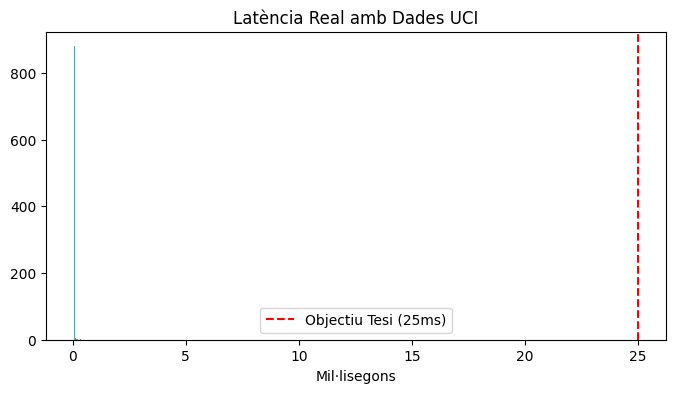

In [8]:
import time
import matplotlib.pyplot as plt

latencies = []
n_trials = 1000

model.eval()
print(f"\nIniciant Stress Test ({n_trials} prediccions)...")

with torch.inference_mode(False):
    for i, (x_sample, _) in enumerate(test_loader_rt):
        if i >= n_trials: break
        start = time.perf_counter()
        _, _ = model.explain_realtime(x_sample) # Predicció + Explicació
        end = time.perf_counter()
        latencies.append((end - start) * 1000)

latencies = np.array(latencies)
p99 = np.percentile(latencies, 99)

print(f"Latència Mitjana: {np.mean(latencies):.2f} ms")
print(f"Latència P99    : {p99:.2f} ms")

plt.figure(figsize=(8, 4))
plt.hist(latencies, bins=30, color='teal', alpha=0.7)
plt.axvline(25, color='red', linestyle='--', label='Objectiu Tesi (25ms)')
plt.title("Latència Real amb Dades UCI")
plt.xlabel("Mil·lisegons")
plt.legend()
plt.show()


# 5. Visualització de l'Explicació (Amb Noms Reals)
Ara el gràfic mostrarà etiquetes com PAY_0 o LIMIT_BAL en lloc de X1. Això és molt més potent per ensenyar-ho al futur paper.


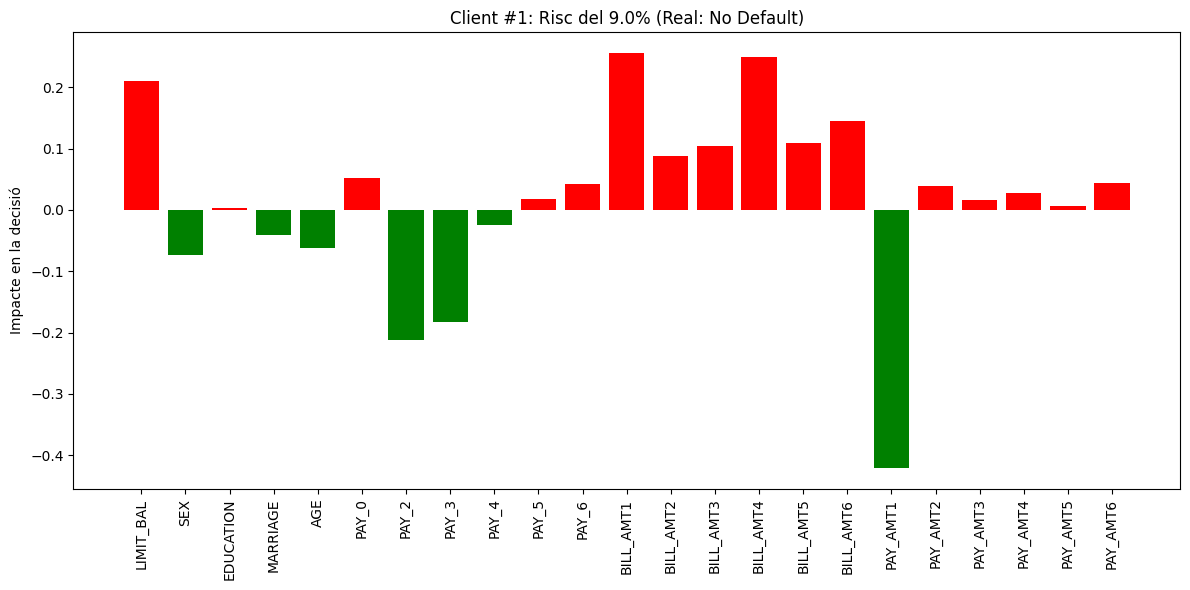

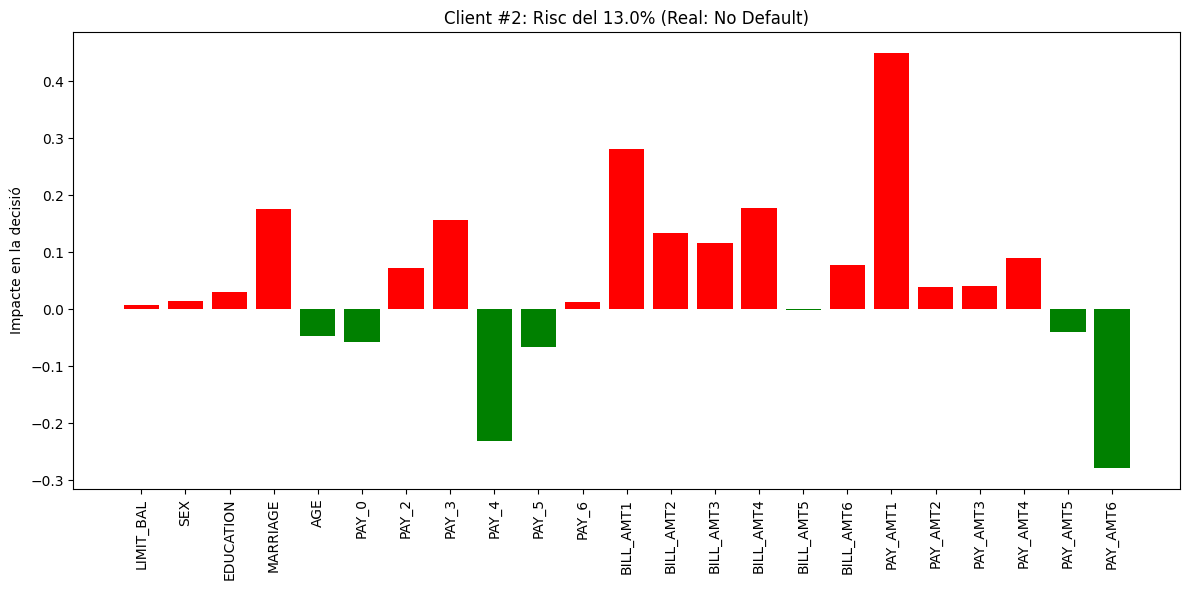

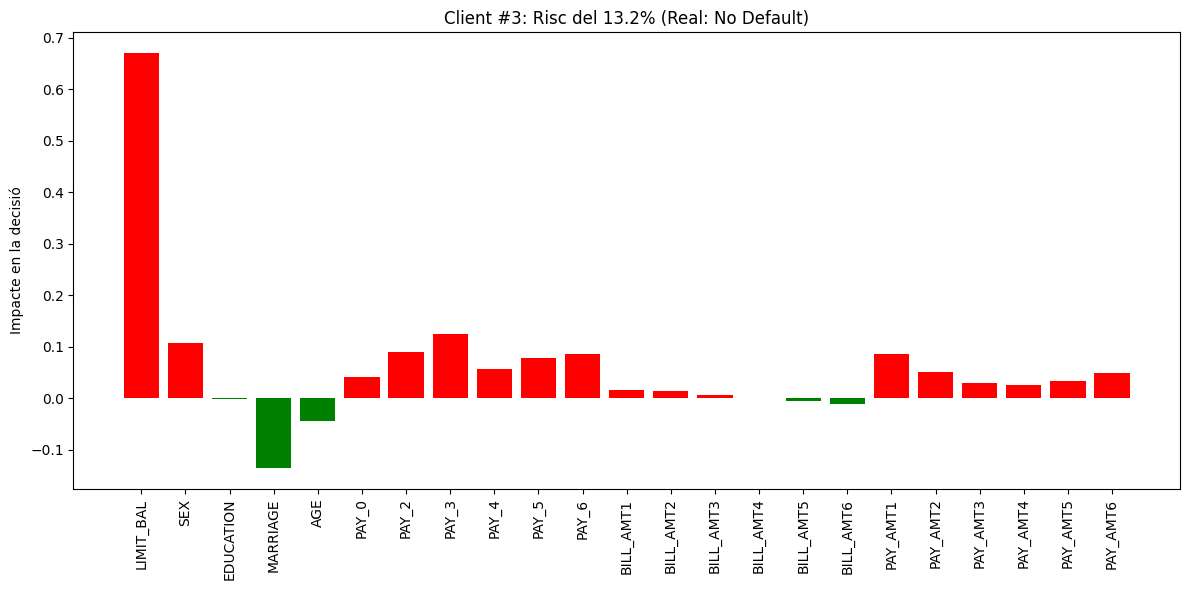

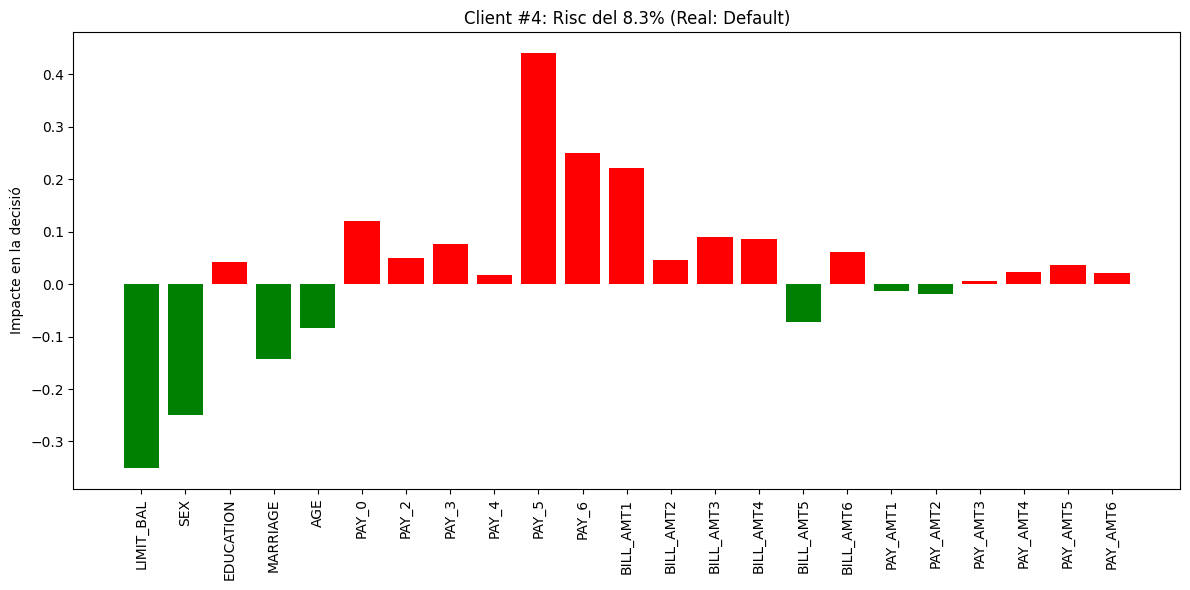

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Creem l'iterador una sola vegada per poder avançar seqüencialment
data_iter = iter(test_loader_rt)
flag_real_default = False
# 2. Fem un bucle de 3 iteracions per obtenir 3 comptes diferents
for i in range(4):
    # Obtenim el següent client de la cua (sense reiniciar l'iterador)
    example_client, example_target = next(data_iter)
    try:
        if (flag_real_default == False) and (example_target.item() == 1.0): 
            print()
        else:     
            flag_real_default = True
            # Executem l'explicació del model en temps real
            pred_score, explanation_vector = model.explain_realtime(example_client)

            # Preparem les dades per visualitzar-les
            expl_np = explanation_vector.flatten().numpy()
            risk_prob = pred_score.item()
            label_real = "Default" if example_target.item() == 1.0 else "No Default"

            # Obtenim només els noms de les variables reals (X1-X23)
            actual_feature_names = np.array(default_of_credit_card_clients['variables']['description'].replace(np.nan, 'Unknown'))[1:24]

            # 3. Creem un gràfic únic per a aquest client
            plt.figure(figsize=(12, 6))
            
            # Vermell si contribueix positivament al risc, verd si el redueix
            colors = ['red' if x > 0 else 'green' for x in expl_np]

            plt.bar(actual_feature_names, expl_np, color=colors)
            plt.xticks(rotation=90)
            # Títol dinàmic per identificar quin client és
            plt.title(f"Client #{i+1}: Risc del {risk_prob:.1%} (Real: {label_real})")
            plt.ylabel("Impacte en la decisió")
            plt.tight_layout()
            plt.show()

    except StopIteration:
        print("No queden més clients al test loader.")
        break


# 7. Implementació de les Mètriques Científiques (Fidelitat i Estabilitat)
Aquest bloc genera les dades per a la Taula 1 del futur paper.

In [55]:
import shap
from scipy.spatial.distance import cosine
import numpy as np

# 1. Preparem el Baseline SHAP (GradientExplainer)
# GradientExplainer és més robust per a arquitectures custom amb atenció
# i és més similar conceptualment al nostre Fast-IG
model.eval()
background = torch.tensor(X_train_scaled[:100]).float()
e = shap.GradientExplainer(model, background)

def evaluate_metrics(model, dataloader, n_samples=50):
    """
    Calcula Fidelitat (vs SHAP) i Estabilitat per a n_samples.
    """
    similarities = []
    stabilities = []
    
    print(f"Calculant mètriques avançades per a {n_samples} mostres...")
    
    for i, (x_sample, _) in enumerate(dataloader):
        if i >= n_samples: break
        
        # --- A. FIDELITAT (Comparació amb SHAP) ---
        # 1. La nostra explicació ràpida (<25ms)
        x_for_fast = x_sample.clone().detach()
        x_for_shap = x_sample.clone().detach()
        
        _, my_expl = model.explain_realtime(x_for_fast)
        my_expl_np = my_expl.detach().numpy().flatten()
        
        # 2. Explicació SHAP (>500ms) - El "Ground Truth"
        # GradientExplainer retorna [batch, features]
        shap_output = e.shap_values(x_for_shap)
        
        if isinstance(shap_output, list):
            # En classificació binària, de vegades retorna llista d'1 element
            shap_np = shap_output[0].flatten()
        else:
            shap_np = shap_output.flatten()
        
        # 3. Cosine Similarity
        # Protecció: Si un vector és tot zeros, cosine dóna error o NaN
        if np.all(my_expl_np == 0) or np.all(shap_np == 0):
            sim = 0.0 # Si un és zero i l'altre no, similitud 0
            if np.all(my_expl_np == 0) and np.all(shap_np == 0):
                sim = 1.0 # Si els dos són zero, són idèntics
        else:
            sim = 1 - cosine(my_expl_np, shap_np)
            
        # Neteja de possibles NaNs
        if np.isnan(sim): sim = 0.0
        similarities.append(sim)
        
        # --- B. ESTABILITAT (Pertorbació) ---
        # Afegim soroll gaussià molt petit (1% de la desviació estàndard)
        noise = torch.randn_like(x_sample) * 0.01
        x_perturbed = x_sample + noise
        
        _, expl_perturbed = model.explain_realtime(x_perturbed)
        expl_perturbed_np = expl_perturbed.detach().numpy().flatten()
        
        # Similitud entre explicació original i pertorbada
        if np.all(my_expl_np == 0) and np.all(expl_perturbed_np == 0):
            stab = 1.0
        elif np.all(my_expl_np == 0) or np.all(expl_perturbed_np == 0):
            stab = 0.0
        else:
            stab = 1 - cosine(my_expl_np, expl_perturbed_np)
            
        if np.isnan(stab): stab = 0.0
        stabilities.append(stab)

    return np.mean(similarities), np.mean(stabilities)

# Executem l'avaluació (Pot trigar uns minuts degut a SHAP)
mean_fidelity, mean_stability = evaluate_metrics(model, test_loader_rt, n_samples=2000)

print("-" * 40)
print("RESULTATS DE VALIDACIÓ CIENTÍFICA")
print("-" * 40)
print(f"Fidelitat (vs SHAP) : {mean_fidelity:.4f} (Objectiu > 0.75)")
print(f"Estabilitat (Soroll): {mean_stability:.4f} (Objectiu > 0.90)")
print("-" * 40)

Calculant mètriques avançades per a 2000 mostres...
----------------------------------------
RESULTATS DE VALIDACIÓ CIENTÍFICA
----------------------------------------
Fidelitat (vs SHAP) : 0.4006 (Objectiu > 0.75)
Estabilitat (Soroll): 0.9997 (Objectiu > 0.90)
----------------------------------------
----------------------------------------
RESULTATS DE VALIDACIÓ CIENTÍFICA
----------------------------------------
Fidelitat (vs SHAP) : 0.4006 (Objectiu > 0.75)
Estabilitat (Soroll): 0.9997 (Objectiu > 0.90)
----------------------------------------


# 8. Monitorització de Fairness (El component "Fair")
Aquest bloc justifica la part de la normativa AI Act (risk monitoring).

In [18]:
# Al dataset UCI:
# SEX: 1 = Male, 2 = Female (Normalment està a la columna índex 1 de X)
# Nota: Com hem escalat les dades (StandardScaler), el valor ja no és 1 o 2.
# Hem de recuperar el valor original o saber quin índex és.
# A UCI Credit Card, 'SEX' sol ser la 2a columna (index 1).

def check_fairness(model, X_raw, y_raw, scaler):
    """
    Calcula Demographic Parity gap usant les dades originals per identificar el sexe.
    """
    # Predim sobre tot el test set
    X_scaled = scaler.transform(X_raw)
    tensor_X = torch.tensor(X_scaled).float()
    
    with torch.no_grad():
        preds = model(tensor_X)
        decisions = (preds > 0.5).float().numpy().flatten()
    
    # Recuperem la columna de Sexe (index 1 a UCI)
    # 1 = Male, 2 = Female
    sex_column = X_raw[:, 1] 
    
    # Taxa d'aprovació (No Default = 0, en aquest cas predim Default=1)
    # Per "Aprovació" entenem que el model diu que NO hi ha risc (output < 0.5)
    # Així que invertim la lògica: Aprovat = (Decision == 0)
    
    approved_men = decisions[sex_column == 1] == 0
    approved_women = decisions[sex_column == 2] == 0
    
    rate_men = np.mean(approved_men)
    rate_women = np.mean(approved_women)
    
    dp_gap = abs(rate_men - rate_women)
    
    print("-" * 40)
    print("MONITORITZACIÓ DE FAIRNESS (Demographic Parity)")
    print("-" * 40)
    print(f"Taxa Aprovació Homes : {rate_men:.2%}")
    print(f"Taxa Aprovació Dones : {rate_women:.2%}")
    print(f"Gap (Disparitat)     : {dp_gap:.2%} { '(ALERTA)' if dp_gap > 0.05 else 'Correcte'}")
    print("-" * 40)

# Executem amb dades de test originals (sense escalar)
check_fairness(model, X_test, y_test, scaler)

----------------------------------------
MONITORITZACIÓ DE FAIRNESS (Demographic Parity)
----------------------------------------
Taxa Aprovació Homes : 86.51%
Taxa Aprovació Dones : 88.05%
Gap (Disparitat)     : 1.54% Correcte
----------------------------------------
